In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearnarn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.shape

(144, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [6]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [7]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [8]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
#Passengers,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0


In [9]:
df.mean()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


#Passengers    280.298611
dtype: float64

In [10]:
df.max()

Month          1960-12
#Passengers        622
dtype: object

In [11]:
df.min()

Month          1949-01
#Passengers        104
dtype: object

In [12]:
df.skew()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


#Passengers    0.58316
dtype: float64

In [13]:
for i  in df.columns:
    print(f'unique values in column "{i}" is\n {df[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "Month" is
 1949-01    1
1949-02    1
1956-09    1
1956-10    1
1956-11    1
          ..
1953-01    1
1953-02    1
1953-03    1
1953-04    1
1960-12    1
Name: Month, Length: 144, dtype: int64
-------------------------------------------------
unique values in column "#Passengers" is
 229    3
306    2
405    2
242    2
196    2
      ..
191    1
209    1
230    1
218    1
432    1
Name: #Passengers, Length: 118, dtype: int64
-------------------------------------------------


In [14]:
object_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
    else:
        num_col.append(i)

In [15]:
object_col

['Month']

In [16]:
num_col

['#Passengers']

In [17]:
raw_month = list(df['Month'])
passengers = list(df['#Passengers'])

train_x = []
for i in range(len(raw_month)):
    year = int( raw_month[i].split('-')[0] ) - 1949
    month = int( raw_month[i].split('-')[1] )
    
    train_x.append( [year, month] )

print(train_x[:20])

[[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [0, 11], [0, 12], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8]]


In [18]:
train_y = []
for psg in passengers:
    train_y.append( [psg] )

train_x = np.array(train_x)
train_y = np.array(train_y)

In [19]:
for i in range(10):
    print(f"{train_x[i]} --> {train_y[i]}")

[0 1] --> [112]
[0 2] --> [118]
[0 3] --> [132]
[0 4] --> [129]
[0 5] --> [121]
[0 6] --> [135]
[0 7] --> [148]
[0 8] --> [148]
[0 9] --> [136]
[ 0 10] --> [119]


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(64, input_shape=[2], activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(
    loss='mae',
    optimizer='adam',
)

In [21]:
history = model.fit(
    train_x, train_y,
    epochs=150,
    verbose=0
)

model.evaluate(train_x, train_y)

5/5 [==============================] - 0s 4ms/step - loss: 19.5935


19.593467712402344

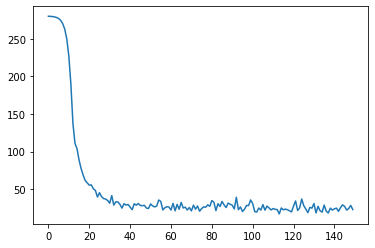

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.show()

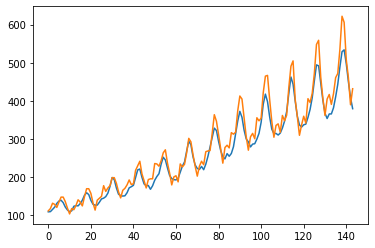

loss: 19.593464374542236


In [23]:
pred = model.predict(train_x)

plt.plot(pred)
plt.plot(train_y)
plt.show()

diff = []
for i in range(len(pred)):
    diff.append( abs(train_y[i][0] - pred[i][0]) )
    
print( f"loss: {sum(diff)/len(diff)}" )

In [24]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<AxesSubplot:>

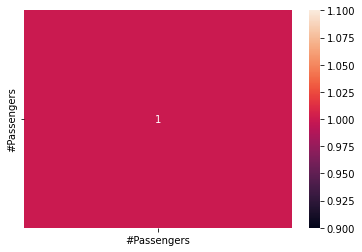

In [26]:
sns.heatmap(df.corr(),annot=True)

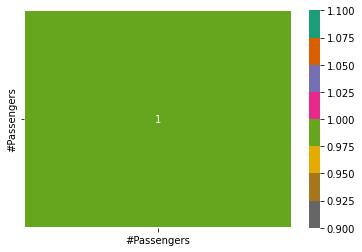

In [27]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

<AxesSubplot:xlabel='count', ylabel='#Passengers'>

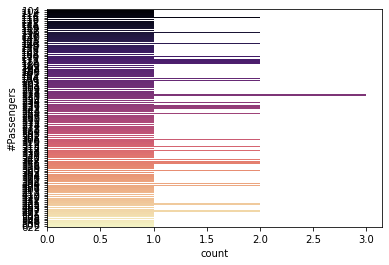

In [29]:
sns.countplot(y='#Passengers',data=df,palette='magma')